In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

(500, 1) (500,)


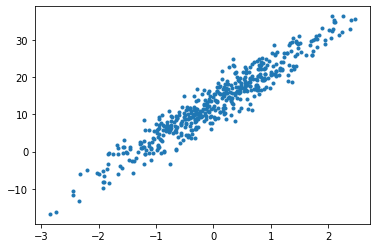

In [3]:
X,y = make_regression(n_samples=500,n_features=1,bias=13,noise=3)
print(X.shape,y.shape)
plt.plot(X,y,'.')
plt.show()
#bias controls the value at 0,0
#noise controls the spread

In [5]:
split=int(0.8*X.shape[0])

X_train=X[:split]
X_test=X[split:]

y_train=y[:split]
y_test=y[split:]

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(400, 1) (400,) (100, 1) (100,)


In [6]:
def h(x,W): #More generally, we pass a vector X but in this case we only have x1 to work with
    h = W[0]*1 + W[1]*x
    return h

In [7]:
def J(X,W,y_true): #θj:= θj − α(∂(J(θ))/∂θj) See LMS algorithm
    err=0.00
    m=X.shape[0]
    
    for i in range(m):
        err+=(1/2) * ( (h(X[i],W) - y_true[i]) **2 )
    avg_error=err/m
    return avg_error

In [8]:
#update rule

In [17]:
def gradient_descent(X,W,y_true,learn_rate=0.1):
    
    m=X.shape[0]
    grad0=0.0
    grad1=0.0
    for i in range(m): #Normal Gradient Descent
        grad0+=(y_true[i] - h(X[i],W))*1
        grad1+=(y_true[i] - h(X[i],W))*X[i]
    grad0/=m
    grad1/=m
    W[0] += learn_rate * grad0
    W[1] += learn_rate * grad1
    error = J(X,W,y_true)
    return error, W

[12.99044238  9.36305489]


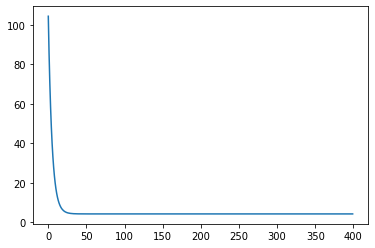

In [19]:
W=np.array([0.1,0.1])#Try doing this by random selection
loss = []
for i in range(400):
    error, W = gradient_descent(X_train,W,y_train) #Try playing with the learning rate
    loss.append(error)
print(W)
plt.plot(loss)

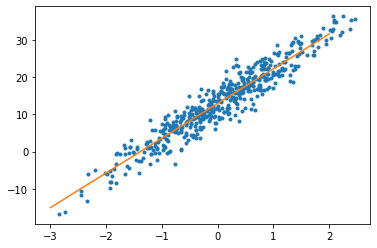

In [20]:
plt.plot(X,y,'.')
x=np.arange(-3,3)
z=W[0]+W[1]*x
plt.plot(x,z)
plt.show()

In [38]:
def stochastic_gradient_descent(X,W,y_true,learn_rate=0.1):
    m=X.shape[0]
    loss=[]
    for i in range(m): 
        grad0=(y_true[i] - h(X[i],W))*1
        grad1=(y_true[i] - h(X[i],W))*X[i]
        W[0]=learn_rate*grad0
        W[1]=learn_rate*grad1
    error = J(X,W,y_true)
    loss.append(error)
    return loss,W

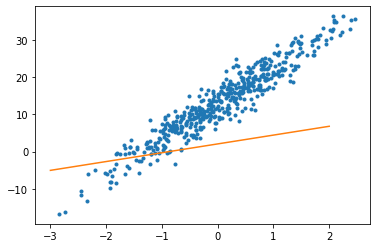

In [47]:
loss,w = stochastic_gradient_descent(X_train,W,y_train,learn_rate=0.1)
plt.plot(X,y,'.')
x=np.arange(-3,3)
z=w[0]+w[1]*x
plt.plot(x,z)
plt.show()